In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Part 1: Analyzing Best-Seller Trends Across Product Categories

In [54]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

df.head

<bound method NDFrame.head of              uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  stars  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...    4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...    4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...    4.6     1881   
...                                                    ...    ...      ...   
2443646  Motorbike Armour, Motorbike Cl

In [55]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [56]:
# 1 CROSSTAB ANALYSIS

crosstab_result = pd.crosstab(df['category'], df['isBestSeller']).sort_values(by=True, ascending=False).head(10)

crosstab_result

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


In [ ]:
# Yes. For these categories being a best-seller is prevelent: Grocery, Smart Home Security & Lighting, Health & Personal Care, Mobile Phone Accesories

In [57]:
# 2 STATISTICAL TESTS

## 2.1 CHI-SQUARE 

from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_p_value

0.0

In [ ]:
# DEPENDENT - p_value is 0.0 showing a strong evidence against null hypothesis. there is very strong relationship between the category and whether an item is a best-seller

In [58]:
## 2.2  CRAMERS'V

from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.16999680408904638

In [ ]:
# cramer's value suggests that there is some association between the category and isBestSeller, but it is not very strong

Text(0.5, 1.0, 'Relatioship between Category and isBestSeller')

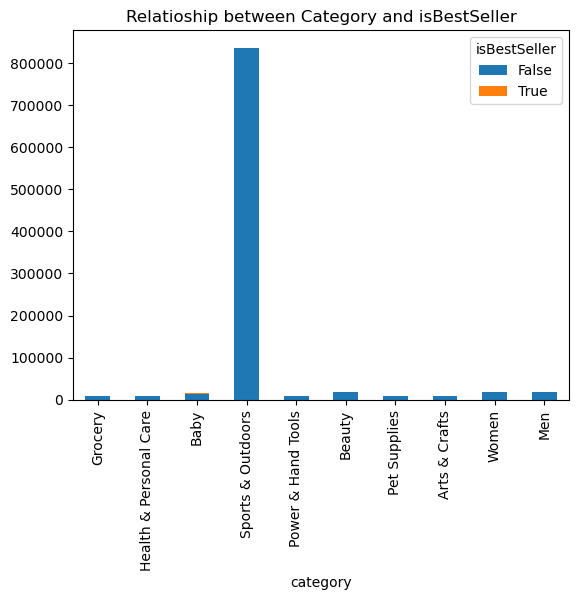

In [59]:
# Visualizations

crosstab_result.plot(kind="bar", stacked=True)
plt.title("Relatioship between Category and isBestSeller", fontsize=12)

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [60]:
# 0. Preliminary Step: Remove outliers in product prices.

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [61]:

data_series = df['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)


10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [67]:
#remving the outliers from the original df

df = df[~df['price'].isin(outliers)]
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [81]:
# 1. Violin Plots

top_20_categories = df['category'].value_counts().head(20).index
top_20_categories

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [82]:
df_top_20 = df[df['category'].isin(top_20_categories)]
df_top_20

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

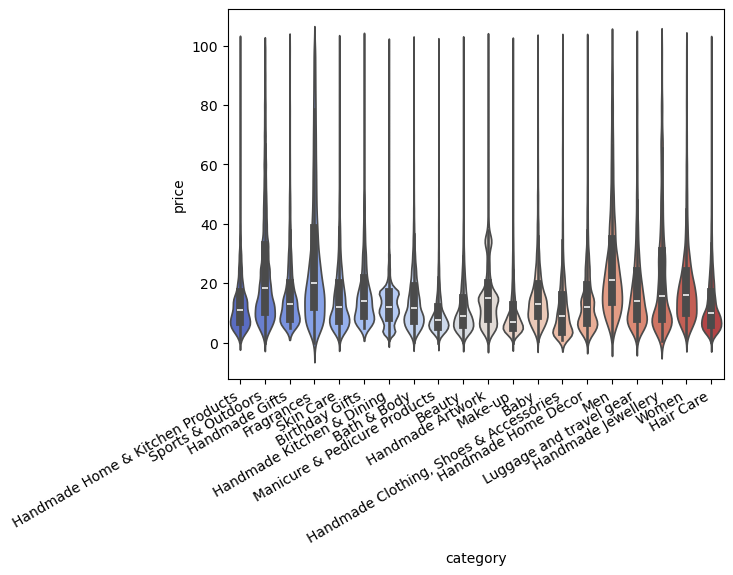

In [92]:
sns.violinplot(data=df_top_20, x='category', y='price', hue='category', palette="coolwarm", legend=False)
plt.xticks(rotation=30, ha="right")

In [ ]:
# Fragances and Men hace the highest median price

In [94]:
# 1. Bar Charts

top_10_categories = df['category'].value_counts().head(10).index
top_10_categories

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts'],
      dtype='object', name='category')

In [110]:
df_top_10 = df[df['category'].isin(top_10_categories)]
df_top_10

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [111]:
avg_price_per_category = df_top_10.groupby('category')['price'].mean()
avg_price_per_category

category
Bath & Body                               14.678683
Beauty                                    12.523480
Birthday Gifts                            18.600195
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Handmade Gifts                            17.395112
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Skin Care                                 15.654722
Sports & Outdoors                         25.172065
Name: price, dtype: float64

In [112]:
avg_price_top_10 = avg_price_per_category[top_10_categories].sort_values(ascending=False)
avg_price_top_10

category
Sports & Outdoors                         25.172065
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Skin Care                                 15.654722
Bath & Body                               14.678683
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Name: price, dtype: float64

/var/folders/yz/shh48k7s5kg3qtp0x9hzjb6c0000gn/T/ipykernel_25344/3104396164.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_top_10.index, y=avg_price_top_10.values, palette="coolwarm")


Text(0.5, 1.0, 'Average Price of Products for Top 10 Categories')

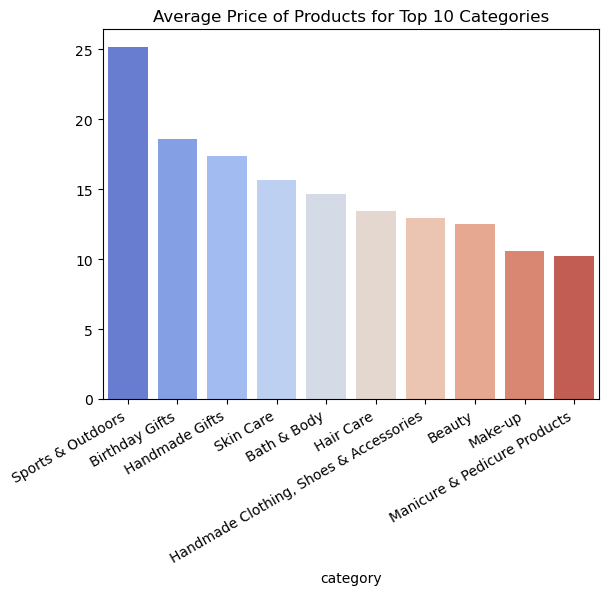

In [113]:
sns.barplot(x=avg_price_top_10.index, y=avg_price_top_10.values, palette="coolwarm")
plt.xticks(rotation=30, ha="right")
plt.title('Average Price of Products for Top 10 Categories')


In [118]:
# 3. Box Plots

avg_rating_per_category = df.groupby('category')['stars'].mean()

avg_rating_per_category

category
3D Printers                       2.772222
3D Printing & Scanning            0.094067
Abrasive & Finishing Products     4.119433
Action Cameras                    1.280131
Adapters                          4.142520
                                    ...   
Wind Instruments                  3.524576
Window Treatments                 4.102954
Women                             4.167733
Women's Sports & Outdoor Shoes    3.977648
eBook Readers & Accessories       1.532857
Name: stars, Length: 296, dtype: float64

In [120]:
top_10_rating_categories = avg_rating_per_category.sort_values(ascending=False).head(10)

top_10_rating_categories

category
Luxury Food & Drink                    4.544140
Grocery                                4.469414
Laptop Accessories                     4.449600
Health & Personal Care                 4.439549
Arts & Crafts                          4.432942
Office Paper Products                  4.430000
Customers' Most Loved                  4.404388
Water Coolers, Filters & Cartridges    4.394505
USB Hubs                               4.357430
Power & Hand Tools                     4.351565
Name: stars, dtype: float64

/var/folders/yz/shh48k7s5kg3qtp0x9hzjb6c0000gn/T/ipykernel_25344/2611632433.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=top_10_rating_categories.index, y=top_10_rating_categories.values, palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Luxury Food & Drink'),
  Text(1, 0, 'Grocery'),
  Text(2, 0, 'Laptop Accessories'),
  Text(3, 0, 'Health & Personal Care'),
  Text(4, 0, 'Arts & Crafts'),
  Text(5, 0, 'Office Paper Products'),
  Text(6, 0, "Customers' Most Loved"),
  Text(7, 0, 'Water Coolers, Filters & Cartridges'),
  Text(8, 0, 'USB Hubs'),
  Text(9, 0, 'Power & Hand Tools')])

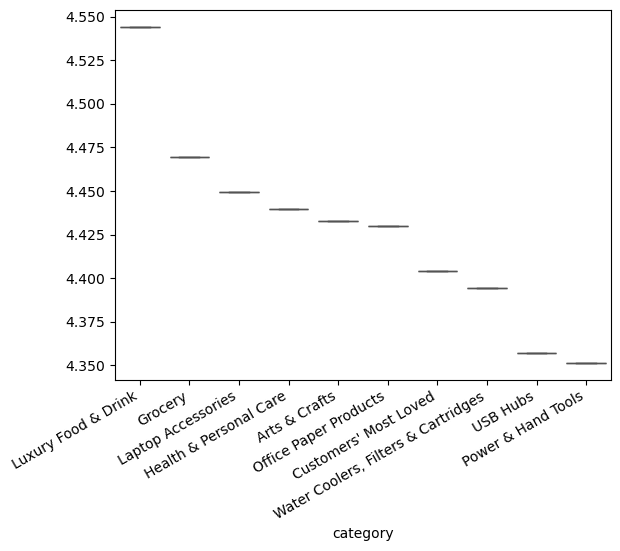

In [122]:
sns.boxplot(x=top_10_rating_categories.index, y=top_10_rating_categories.values, palette="coolwarm")
plt.xticks(rotation=30, ha="right")

In [ ]:
# Luxury Food & Drink tends to receive the highest median rating from customers

## Part 3: Investigating the Interplay Between Product Prices and Ratings

In [128]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [129]:
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

df_categorical, df_numerical

(               asin                                              title  \
 0        B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...   
 1        B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...   
 2        B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...   
 3        B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...   
 4        B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...   
 ...             ...                                                ...   
 2443646  B0CHSD7P2Q  Motorbike Armour, Motorbike Clothing, Cycling ...   
 2443647  B0B7B8FNBQ  PROFIRST Waterproof Motorcycle 2 Piece Ladies ...   
 2443648  B0BD5FL5FB  Men’s Motorcycle Motorbike Biker Trousers Kevl...   
 2443649  B008OYLL4I  Texpeed Mens Motorcycle Motorbike Biker Trouse...   
 2443650  B08P3W9B3T  RIDEX CJ223 Motorcycle Motorbike Jacket Armour...   
 
                    category  
 0            Hi-Fi Speakers  
 1            Hi-Fi Speakers  
 2   

In [131]:
spearman_correlations = df_numerical.corrwith(df['price'], method='spearman')

spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

spearman_correlations_sorted

price                1.000000
uid                 -0.003152
stars               -0.066797
reviews             -0.078127
boughtInLastMonth   -0.167260
dtype: float64

In [133]:
correlation = df['price'].corr(df['stars'])
correlation

-0.07767299878181444

In [134]:
correlation = df['price'].corr(df['stars'], method='spearman')
correlation

-0.06679697280768455

In [ ]:
# the negative and small correlaton indicates that price and stars tend move in opposite directions and are very weakly related.

<Axes: xlabel='stars', ylabel='price'>

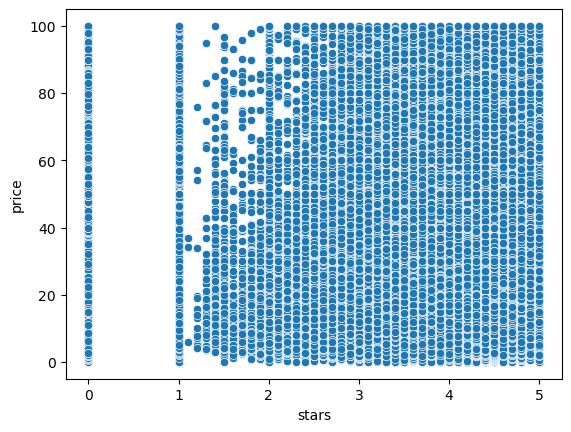

In [135]:
# 2.1

sns.scatterplot(data=df, x='stars', y='price')

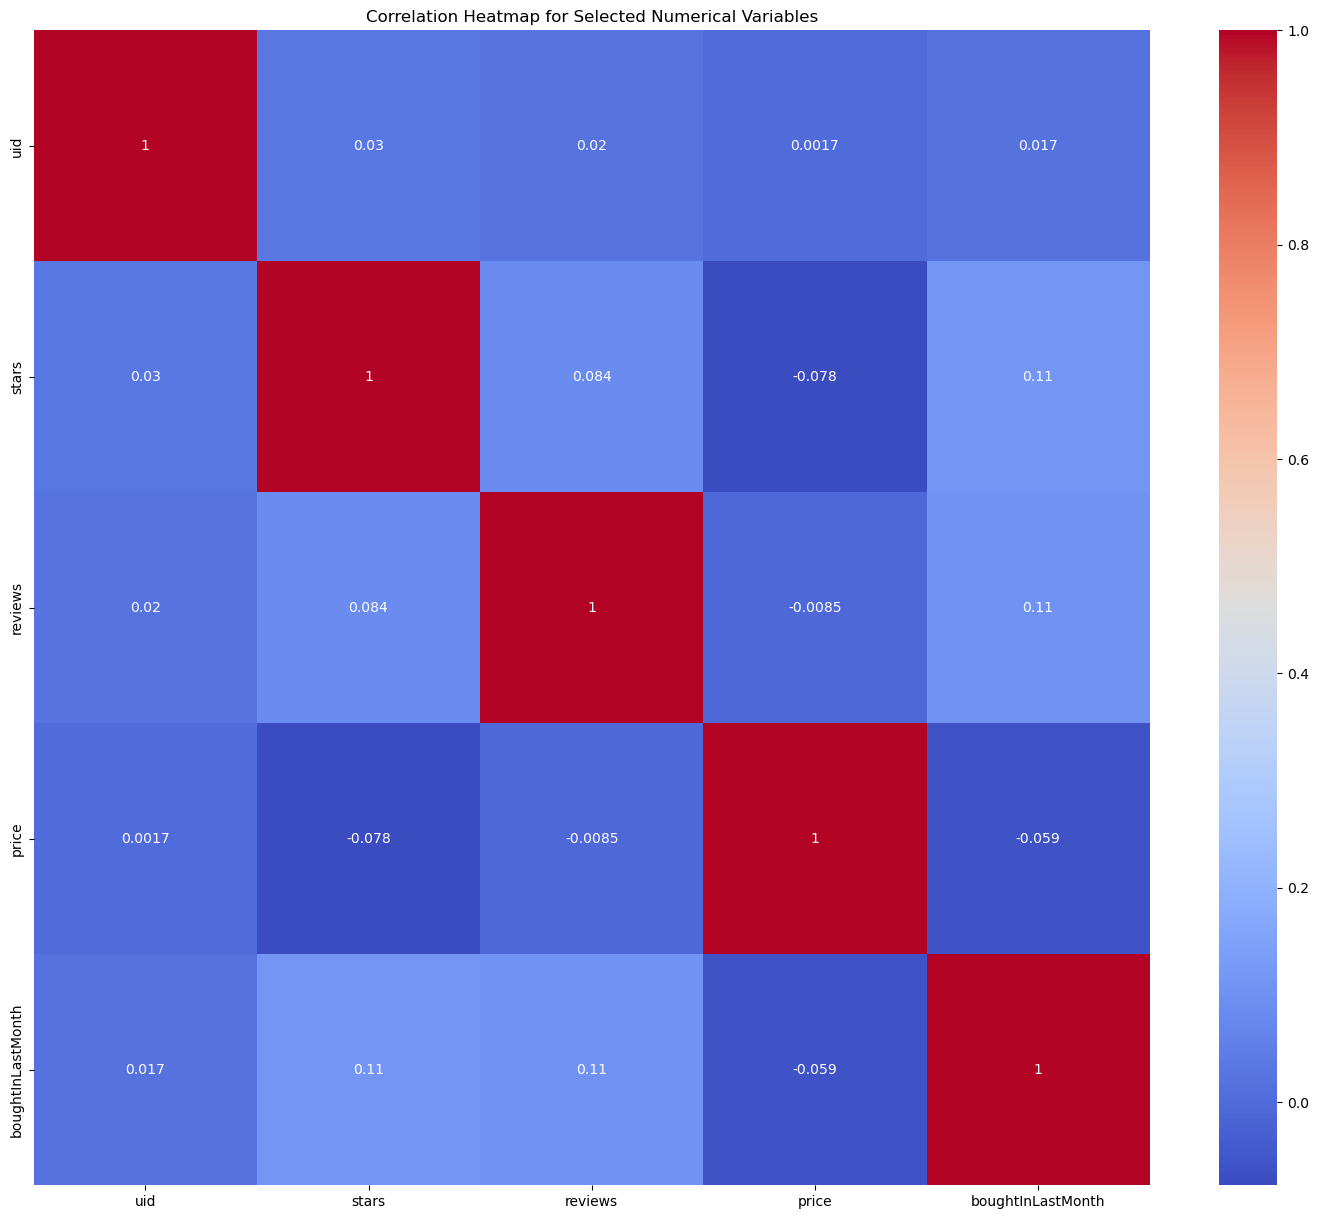

In [132]:
# 2.2

correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

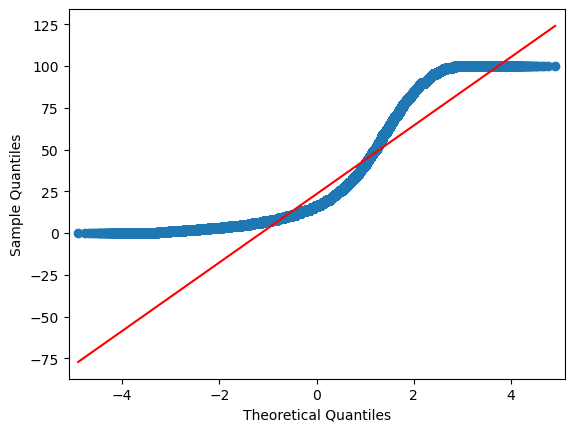

In [136]:
import statsmodels.api as sm

sm.qqplot(df['price'], line='s');